In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


In [4]:
mnist = tf.keras.datasets.fashion_mnist

In [5]:
(training_images, training_labels), (testing_images, testing_labels) = mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


2
[[  0   0   0   0   1   0   0   0   0  22  88 188 172 132 125 141 199 143   9   0   0   0   1   0   0   0   0   0]
 [  0   0   0   1   0   0  20 131 199 206 196 202 242 255 255 250 222 197 206 188 126  17   0   0   0   0   0   0]
 [  0   0   0   1   0  35 214 191 183 178 175 168 150 162 159 152 158 179 183 189 195 185  82   0   0   0   0   0]
 [  0   0   0   0   0 170 190 172 177 176 171 169 162 155 148 154 169 174 175 175 177 183 188  12   0   0   0   0]
 [  0   0   0   0  25 194 180 178 174 184 187 189 187 184 181 189 200 197 193 190 178 175 194  90   0   0   0   0]
 [  0   0   0   0  42 218 191 197 208 204 211 209 210 212 211 214 215 213 214 211 211 191 200 158   0   0   0   0]
 [  0   0   0   0  88 221 215 217 219 211 185 150 118 107  99  88  83  90 135 212 203 207 219 169   0   0   0   0]
 [  0   0   0   0   0  27 118 162  40   0   0   0  10  19  28  39  47  36   0   0 203 230 220 203   0   0   0   0]
 [  0   0   0   0 138 136  71  69  54 216 217 203 184 168 163 162 163 178 221 

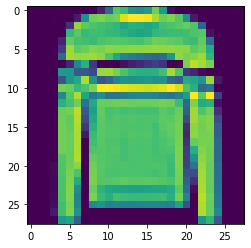

In [6]:
np.set_printoptions(linewidth = 200)
plt.imshow(training_images[5])
print(training_labels[5])
print(training_images[5])

In [8]:
training_images = training_images/255
testing_images = testing_images/255

In [9]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(1024,activation = tf.nn.relu),
                            tf.keras.layers.Dense(129, activation = tf.nn.relu),
                            tf.keras.layers.Dense(13, activation = tf.nn.softmax)])

In [11]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

In [12]:
model.fit(training_images, training_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4750 - acc: 0.8268
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3566 - acc: 0.8692
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3227 - acc: 0.8808
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2959 - acc: 0.8908
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2786 - acc: 0.8951
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2626 - acc: 0.9001
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2505 - acc: 0.9054
Epoch 8/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2410 - acc: 0.9089
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2297 - acc: 0.9134
Epoch 10/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2210 - acc: 0.9158


In [13]:
model.evaluate(testing_images, testing_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3521 - acc: 0.8838


[0.35212522745132446, 0.8838000297546387]

[2.2130277e-10 3.3074374e-09 8.5366540e-11 2.3871120e-12 2.1471791e-10 2.4456456e-05 1.7219896e-10 8.9833830e-03 2.6834248e-09 9.9099219e-01 3.6469622e-17 1.2906584e-17 8.8831581e-17]
9


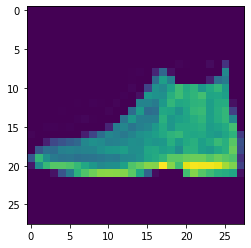

In [14]:
classification = model.predict(testing_images)
print(classification[0])
print(testing_labels[0])
plt.imshow(testing_images[0])